# Wizualizacja danych w Python

## Wstęp

Cykl życia projektów _Data Science_ składa się z różnych elementów. Jednym z nich jest etap _Expolratory Data Analysis_ , a więc **Eksploracyjna Analiza Danych**. Jego celem jest przeprowadzenie zaawansowanej analizy statystycznej opierając sie nie tylko na statystykach opisowych, ale również na dobrze dobranych wizualizacjach. Stąd przygotowanie dobrej analizy nie jest możliwe bez umiejętności wizualizacji danych oraz prawidłowej ich interpretacji. 

Istnieje wiele rodzajów wizualizacji danych. Wszystko zależy od tego jakiego rodzaju dane posiadamy - kategoryczne, numeryczne, a może dane zależne od czasu. Każda z metod wizualizacji odpowie nam na inne pytanie, dlatego dobranie odpowiedniej do naszego problemu jest kluczowe w kontekście zrozumienia danych przez nas, jak i naszych kolegów z zespołu czy kierownictwo.

Poniższy Tutorial opiera się na trzech najczęściej wykorzystywanych bibliotekach do wizualizacji danych w Python: **matplotlib**, **seaborn** oraz **plotly**. Są to najczęściej wykorzystywane przez nas biblioteki w trakcie trwania projektu. Ich opanowanie jest często kluczowe w kontekście przygotowania dobrej jakości analizy. W naszym odczuciu opanowanie przynajmniej podstaw każdej z tych bibiliotek może zapewnić zbudowanie ciekawej analizy, która odpowie nam na postawione przez nas pytanie. Oczywiście musicie mieć na uwadze, że nie wyczerpują one pełnej gamy dostępnych bibliotek czy metod wizualizacjii danych. 

<div class="alert alert-block alert-success">
<b>Wnioski:</b> 
    
1. Wizualizacja danych jako niezbędny element Eksploracyjnej Analizy Danych.
2. Dobra wizualizacja to klucz do sukcesu i prawidłowego zrozumienia danych.    

</div>

## Biblioteki

Do poniższego _Tutorialu_ niezbędne będzie zaistalowanie poniższych bibliotek. Wersję każdych z nich wypisane są w pliku _viz_requirements.txt_.

In [1]:
# Pobranie przykladowych danych
from sklearn.datasets import fetch_california_housing

# Data wrangling 
import pandas as pd
import numpy as np

# Data visualization
import seaborn as sns
from matplotlib import pyplot as plt
from plotly import express as px

# Inne
import datetime as dt

## Przygotowanie danych

Do przygotowania wizualizacji posłużą nam dane dostępne w ```sklearn.datasets``` oraz ```seaborn.datasets```.

### Housing

**Opis:** Zestaw danych _California Housing_ zawiera informacje ze spisu powszechnego w Kalifornii z 1990 roku. 

Dane nie są w żaden sposób wyczyszcone, stąd posłużą jako dobry materiał do eksploracyjnej analizy danych.

In [2]:
# Funkcja do przygotowania ramki danych
def data_preparation():
    """Przygotowanie danych na potrzeby notatnika."""
    
    # Load data
    housing = fetch_california_housing()
    
    # Data Array
    df_array = housing.data.copy()
    target = housing.target.copy()
    target = target.reshape(len(target), 1)
    
    df_array = np.concatenate([df_array, target], axis=1)
    
    # Colnames
    colnames = housing.feature_names.copy()
    colnames.append(housing.target_names[0])
    
    # Data Frame
    df = pd.DataFrame(df_array, columns=colnames)
    
    return df

In [3]:
# Pobranie danych

## Housing
housing = data_preparation()

print(f'Wymiar ramki danych: {housing.shape}')
print(f'Nazwy kolumn: {housing.columns.values}')

Wymiar ramki danych: (20640, 9)
Nazwy kolumn: ['MedInc' 'HouseAge' 'AveRooms' 'AveBedrms' 'Population' 'AveOccup'
 'Latitude' 'Longitude' 'MedHouseVal']


In [4]:
# Wysietlenie pierwsyzch 5 obserwacji
housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Niektóre z tych zmiennych poddam transformacji do celów edukacyjnych.

In [5]:
# Data transformation
housing['AveRooms'] = housing['AveRooms'].astype(int)
housing['AveBedrms'] = housing['AveBedrms'].astype(int)

# Feature Engineering
housing['AveRooms_greater_5'] = np.where(housing['AveRooms'] > 5, '>5', '<=5')
housing['MedInc_greater_5'] = np.where(housing['MedInc'] > 5, '>5', '<=5')

In [6]:
housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,AveRooms_greater_5,MedInc_greater_5
0,8.3252,41.0,6,1,322.0,2.555556,37.88,-122.23,4.526,>5,>5
1,8.3014,21.0,6,0,2401.0,2.109842,37.86,-122.22,3.585,>5,>5
2,7.2574,52.0,8,1,496.0,2.802260,37.85,-122.24,3.521,>5,>5
3,5.6431,52.0,5,1,558.0,2.547945,37.85,-122.25,3.413,<=5,>5
4,3.8462,52.0,6,1,565.0,2.181467,37.85,-122.25,3.422,>5,<=5


Przed przystąpieniem do wizualizacji należy zaznaczyć, które z powyższych zmiennych to zmienna celu, a które to zmienne objaśniające.

**Zmienna celu:** MedHouseVal

**Zmienne objaśniające:** MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude, Longitude

### Fmri

**Opis:** Funkcjonalne obrazowanie rezonansem magnetycznym lub funkcjonalny MRI (fMRI) mierzy aktywność mózgu za pomocą silnego, statycznego pola magnetycznego w celu wykrycia zmian związanych z przepływem krwi. Kiedy używany jest obszar mózgu, przepływ krwi do tego obszaru również wzrasta. Zwiększony przepływ krwi jest reprezentowany przez sygnał o wyższej amplitudzie, postrzegany jako silna aktywność nerwowa. 

In [7]:
## Fmri
fmri = sns.load_dataset("fmri")

print(f'Wymiar ramki danych: {fmri.shape}')
print(f'Nazwy kolumn: {fmri.columns.values}')

Wymiar ramki danych: (1064, 5)
Nazwy kolumn: ['subject' 'timepoint' 'event' 'region' 'signal']


In [8]:
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


W tym przypadku mamy do czynienia z pewnymi szeregami czasowymi, gdzie zmienna czasu jest _timepoint_, a zmienna celu _signal_. Szeregi czasowe możemy podzielić względem zmiennej _region_ oraz _event_, gdzie _region == parietal_ dotyczy płatu ciemieniowego, natomimast _region == frontal_ dotyczy jego płatu czołowego mózgu. 

### Tips 

**Opis:** Ramka danych opierająca się na informacjach reprezentujących niektóre dane dotyczące napiwków, w których jeden kelner zapisał informacje o każdym napiwku, który otrzymał w ciągu kilku miesięcy pracy w jednej restauracji. Kelner zebrał kilka zmiennych: napiwek w dolarach, rachunek w dolarach, płeć płatnika rachunku, czy na imprezie byli palacze, dzień tygodnia, pora dnia i wielkość imprezy. 

In [9]:
## Tips
tips = sns.load_dataset("tips")

print(f'Wymiar ramki danych: {tips.shape}')
print(f'Nazwy kolumn: {tips.columns.values}')

Wymiar ramki danych: (244, 7)
Nazwy kolumn: ['total_bill' 'tip' 'sex' 'smoker' 'day' 'time' 'size']


In [10]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


W tym przypadku możemy ustalić następujące zminne objaśniające oraz zmienna celu:

**Zmienna celu:** tip

**Zmienne objaśniające:** total_bill, sex, smoker, day, time, size

### Anscombe

**Opis:** Kwartet Anscombe'a to zestaw czterech zestawów danych o identycznych cechach statystycznych, takich jak średnia arytmetyczna, wariancja, współczynnik korelacji czy równanie regresji liniowej, jednocześnie wyglądających zgoła różnie przy przedstawieniu graficznym. Układ tych danych został stworzony w 1973 roku przez brytyjskiego statystyka Francisa Anscombe'a aby ukazać znaczenie graficznej reprezentacji danych przy okazji ich analizy statystycznej. 

In [11]:
## Anscombe
anscombe = sns.load_dataset("anscombe")

print(f'Wymiar ramki danych: {anscombe.shape}')
print(f'Nazwy kolumn: {anscombe.columns.values}')

Wymiar ramki danych: (44, 3)
Nazwy kolumn: ['dataset' 'x' 'y']


In [12]:
anscombe.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


Poniżej, dowód dotyczących tych samych wartości statystyki średniej arytmetycznej oraz odchylenia standardowego dla zmiennych _x_ i _y_.

In [13]:
anscombe.groupby(['dataset']).agg({
    'x': ['mean', 'std', 'min', 'max'],
    'y': ['mean', 'std', 'min', 'max']
})

x                              y                       
        mean       std  min   max      mean       std   min    max
dataset                                                           
I        9.0  3.316625  4.0  14.0  7.500909  2.031568  4.26  10.84
II       9.0  3.316625  4.0  14.0  7.500909  2.031657  3.10   9.26
III      9.0  3.316625  4.0  14.0  7.500000  2.030424  5.39  12.74
IV       9.0  3.316625  8.0  19.0  7.500909  2.030579  5.25  12.50

# Wizualizacja zależności statystycznych

Analiza statystyczna to proces zrozumienia, w jaki sposób zmienne w zbiorze danych są ze sobą powiązane i jak te relacje zależą od innych zmiennych. Wizualizacja może być kluczowym elementem tego procesu, ponieważ gdy dane są odpowiednio wizualizowane, możemy dostrzec trendy i wzorce wskazujące na związek między nimi. Przeprowadzenie dokładnej analizy statystycznej jest procesem często niezbędnym w pierwszej fazie projektu, gdyd dobre zrozumienie danych jest kluczowe przed przystąpieniem do dalszych etapów projektu. 

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid")

## Badanie relacji między zmiennymi przy użyciu wykresu punktowego

Wykres punktowy jest podstawą wizualizacji statystycznej. Pozwala nam odpowiedzieć na kilka podstwowych pytań:

    - Czy istnieje jakakolwiek zależność między dwiema zmiennymi ?
    - Czy istnieją obserwacje nietypowe (anomalie) ?
    - Czy dane układają nam się może w jakieś podgrupy ?
    
Oczywiście to tylko przykłady. Generalnie, wykres punktowy przedstawia łączny rozkład dwóch zmiennych za pomocą punktów, gdzie każdy punkt reprezentuje obserwacje w zbiorze danych. Wykres tego rodzaju umożliwia wywnioskowanie czy istnieje między zmiennymi jakakolwiek relacja - liniowa bądź nieliniowa. Na jej podstawie możemy też dojść do pierwszych wniosków związanych z przyszłym etapem _Feature Engineering_ - może się okazać, że transformacja zmiennej objaśnianej np. _log_, _power_, _square_ itp. w lepszy sposób wyjaśnia naszą zmienną celu. 

Text(0.5, 1.0, 'Wykres punktowy')

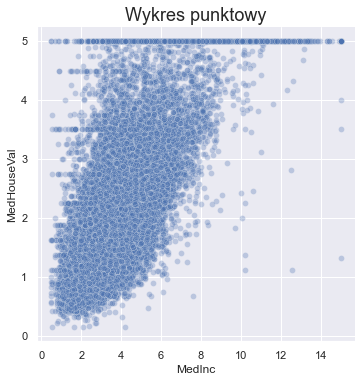

In [15]:
sns.relplot(x="MedInc", y="MedHouseVal", data=housing, alpha=0.3)
plt.title('Wykres punktowy', fontsize=18)

<div class="alert alert-block alert-info">
<b>Info</b> 

W wielu rodzajach wizualizacji pojawia sie parametr ```alpha```. Sluzy on do ustawienia przezroczystosci wykresu. Zdefiniowanie tego parametru jest szczegolnie przydatne, gdy wiele obserwacji nachodzi na siebie. Dzieki ustawieniu malej wartosci _alpha_ jestesmy w stanie okreslic w jakim obszarze wystepuja najczesciej nasze dane.  
</div>

W przypadku biblioteki ```matplotlib``` wykres wyglądał by następująco:

Text(0.5, 1.0, 'Wykres punktowy')

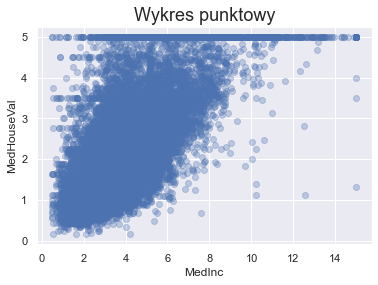

In [16]:
plt.scatter(x=housing['MedInc'], y=housing['MedHouseVal'], alpha=0.3)
plt.xlabel('MedInc')
plt.ylabel('MedHouseVal')
plt.title('Wykres punktowy', fontsize=18)

<div class="alert alert-block alert-info">
<b>Info</b> 

Z uwagi na to, że pod spodem biblioteki ```seaborn``` działa ```matplotlib``` to wiele funkcji, działająych dla ```matplotlib``` tj. _xlabel_, _ylabel_, _title_ działa również dla ```seaborn```.
</div>

W przypadku biblioteki ```seaborn``` w prosty sposób można dodać dodatkową relację do tego rodzaju wykresu. Dodając parameter ```hue```, mamy możliwość sprawdzić powyższą relację względem zmiennej kategorycznej.

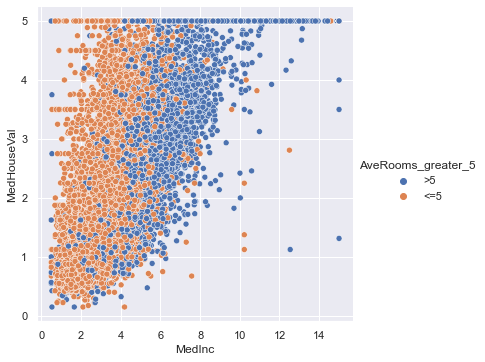

In [17]:
sns.relplot(x="MedInc", y="MedHouseVal", hue="AveRooms_greater_5", data=housing);

Aby sprawdzić kolejną relację, mamy możliwość dodania zmiennej kategorycznej która będzie charakteryzowała się innym znacznikiem - do tego służy parametr ```style```.

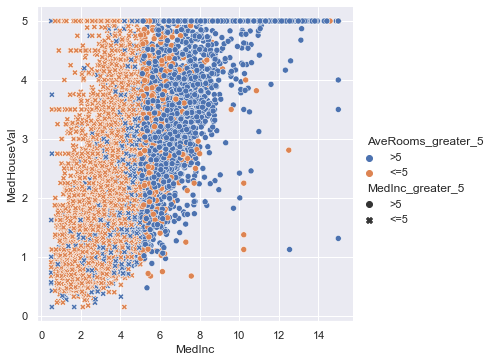

In [18]:
sns.relplot(x="MedInc", y="MedHouseVal", hue="AveRooms_greater_5", style="MedInc_greater_5", data=housing);

Na powyższych wykresach w parametrach ```hue``` oraz ```style``` podane są zmienne kategoryczne. W przypadku podania tam zmiennych numerycznych wizualizacja wyglądała by następująco. 

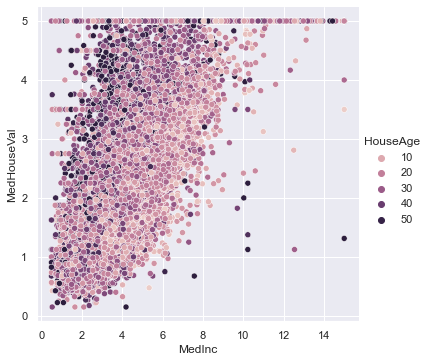

In [19]:
sns.relplot(x="MedInc", y="MedHouseVal", hue="HouseAge", data=housing)

In [20]:
ha_value = np.sort(housing['HouseAge'].unique())

print(f'Unikalne wartości HouseAge: {ha_value}')

Unikalne wartości HouseAge: [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36.
 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52.]


Jak widać funkcja ```relplot``` sama poradziła sobie z podziałem naszej zmiennej tak, aby kolory punktów nie były przypisane do każdej z wartości tylko do ich przedziałów - w tym przypadku do przedziału długości 10 jednostek. 

Bardzo często podczas pracy z danymi chcemy mieć możliwość pracy interaktywnej z naszymi danymi - w tym przypadku bardzo pomocny jest pakiet ```plotly```.

In [21]:
# Wizualizacja - plotly
fig = px.scatter(data_frame=housing, x='MedInc', y='MedHouseVal', color='MedInc_greater_5', title='Wykres punktowy')
fig.show()

W przypadku ```plotly``` zachęcam do indywidualnej nauki. Jego opanowanie na wysokim poziomie na pewno przyda się podczas pracy projektowej.

## Podkreślenie relacji liniowych między zmiennymi

Choć wykresy punktowe są bardzo efektywne i same w sobie są w stanie bardzo dużo powiedzieć nam o relacjach między zmiennymi to nie są jednak uniwersalnym typem wykresu. Wizualizacja powinna być dostosowana do specyfiki analizowanych danych i pytania, na które próbujemy sobie odpowiedzieć. 

W przypadku szeregów czasowych chcemy zrozumieć zmiany ciągłej zmiennej w stosunku do zmiennej czasu. W takiej sytuacji niezbędnym jesy narysowanie wykresu liniowego. 

Wykresy liniowe sprawdzają się gdy naszym celem jest wizualizacja szeregu czasowego lub sprawdzenie ostatecznej zależności liniowej między zmiennymi - jak w przypadku ```regplot``` powyżej. 

W poniższym przykładzie przed przystąpieniem do takiej wizualizacji należy przygotować dane. 

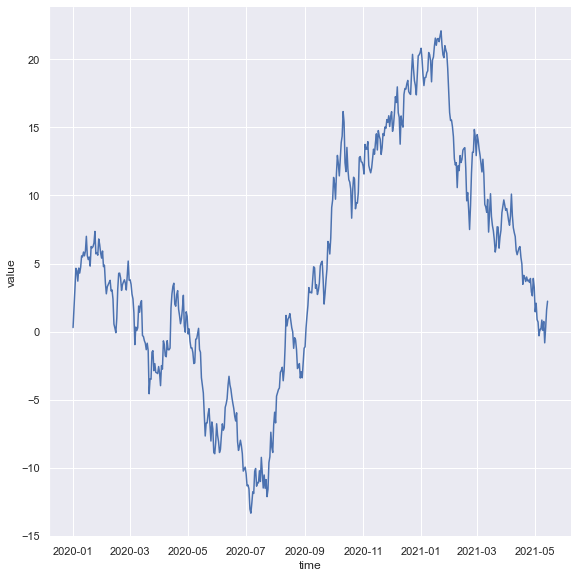

In [22]:
import datetime as dt

n = 500
start = dt.date(2020, 1, 1)
end = start + dt.timedelta(days=n-1)

df_dict = dict(
    time=pd.date_range(start, end),
    value=np.random.randn(n).cumsum()
)

df = pd.DataFrame(df_dict)
g = sns.relplot(x="time", y="value", kind="line", data=df, height=8)

<div class="alert alert-block alert-success">
<b>Uwaga!</b> 
    
Ponieważ _relplot_ zakłada, że najczęściej próbujemy narysować _y_ jako funkcję od _x_, dlatego domyślnym zachowaniem jest sortowanie danych według wartości _x_ narysowaniem wykresu. Sortowanie danych w tym przypadku jest niezwykle istotne - nalezy o tym pamiętać korzystając z innych bibliotek np. ```matplotlib``` lub ```plotly```. 
</div>

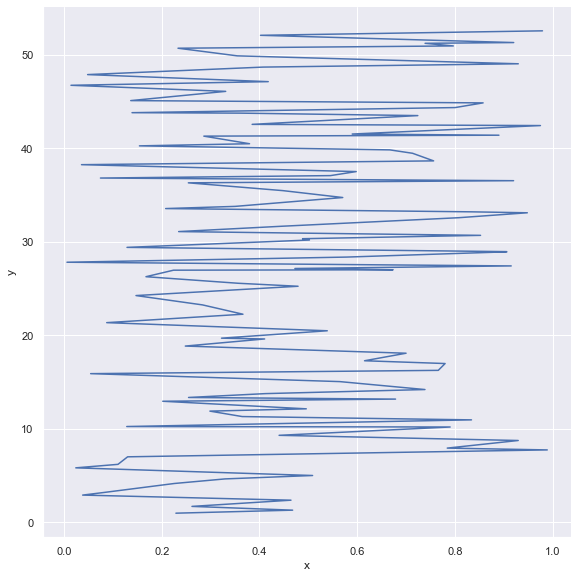

In [23]:
# Przypadek gdy wyłączymy sortowanie względem zmiennej "x"
df_dict = dict(
    x=np.random.rand(100),
    y=np.random.rand(100).cumsum()
)

df = pd.DataFrame(df_dict)
g = sns.relplot(x="x", y="y", kind="line", sort = False, data=df, height=8)

## Wizualizacja w przypadku agregacji danych 

Bardziej złożone zbiory danych będą miały wiele pomiarów dla tej samej wartości zmiennej _x_. Domyślnym zachowaniem w ```seaborn``` jest agregacja wielokrotnych pomiarów dla każdej wartości _x_ poprzez wykreślenie średniej i 95% przedziału ufności wokół średniej.

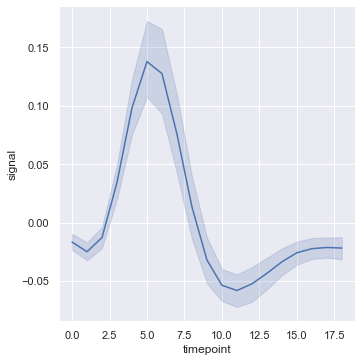

In [24]:
sns.relplot(x="timepoint", y="signal", kind="line", data=fmri);

Czasami wykreślenie przedziału ufności może być czasochłonne, dlatego jest możliwość wyłączenia tego wykorzystując parametr ```ci```.

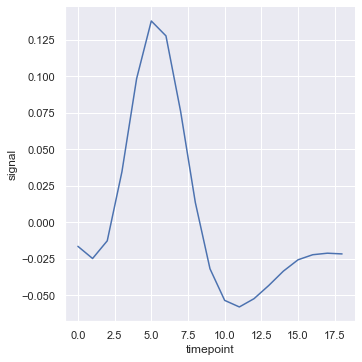

In [25]:
sns.relplot(x="timepoint", y="signal", ci=None, kind="line", data=fmri);

Inną interesującą opcją jest wykreślenie przedziału ufności jako wartość odchylenia standardowego dla danej zmiennej.

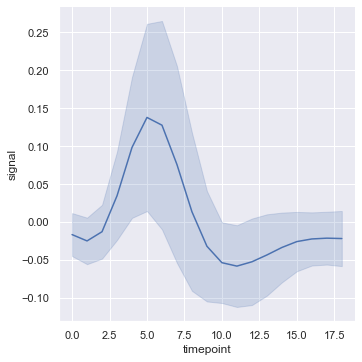

In [26]:
sns.relplot(x="timepoint", y="signal", kind="line", ci="sd", data=fmri);

Oczywiście jest możliwość wyłączenia estymacji średniej dla danej zmiennej, jednak w wyniku tej operacji mamy kilka wartości zmiennej _y_ dla zmiennej _x_. Domyślnym estymatorem jest średnia.

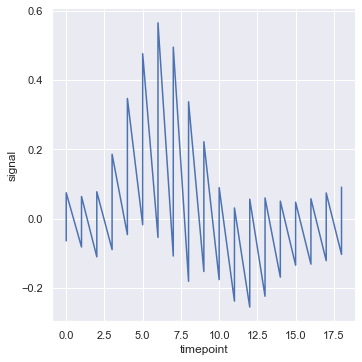

In [27]:
sns.relplot(x="timepoint", y="signal", estimator=None, kind="line", data=fmri);

Funkcja ```relplot(kind="line")``` ma taką samą elastyczność co wykres punktowy. Może pokazywać do trzech dodatkowych zmiennych, modyfikując odcień, rozmiar i styl elementów wykresu. Robi to przy użyciu tego samego API.

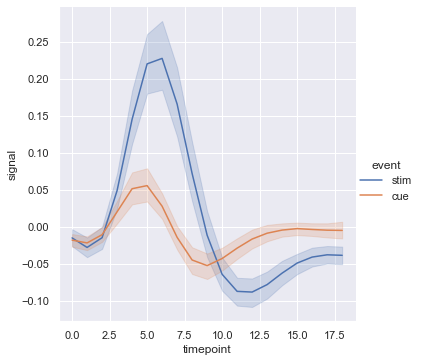

In [28]:
sns.relplot(x="timepoint", y="signal", hue="event", kind="line", data=fmri)

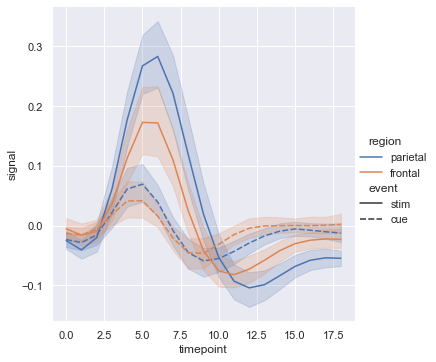

In [29]:
sns.relplot(x="timepoint", y="signal", hue="region", style="event",
            kind="line", data=fmri);

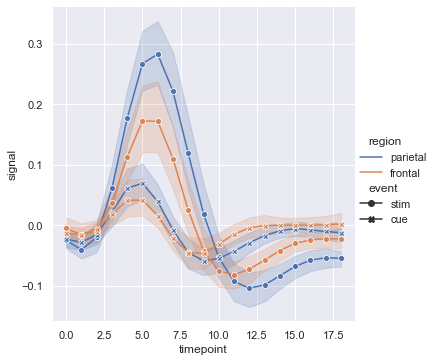

In [30]:
sns.relplot(x="timepoint", y="signal", hue="region", style="event",
            dashes=False, markers=True, kind="line", data=fmri);

Taki sam typ wykresu można przedstawić przy pomocy biblioteki ```matplotlib``` jednak wtedy wymagana jest większa liczba operacji na danych. 

In [31]:
# Data preparation
fmri_agg = fmri.sort_values(by='timepoint').groupby(['timepoint', 'event', 'region']).agg({'signal': 'mean'}).reset_index()

print(f'Wymiar ramki danych: {fmri_agg.shape}')
print(f'Nazwy kolumn: {fmri_agg.columns.values}')

Wymiar ramki danych: (76, 4)
Nazwy kolumn: ['timepoint' 'event' 'region' 'signal']


Text(0, 0.5, 'Signal')

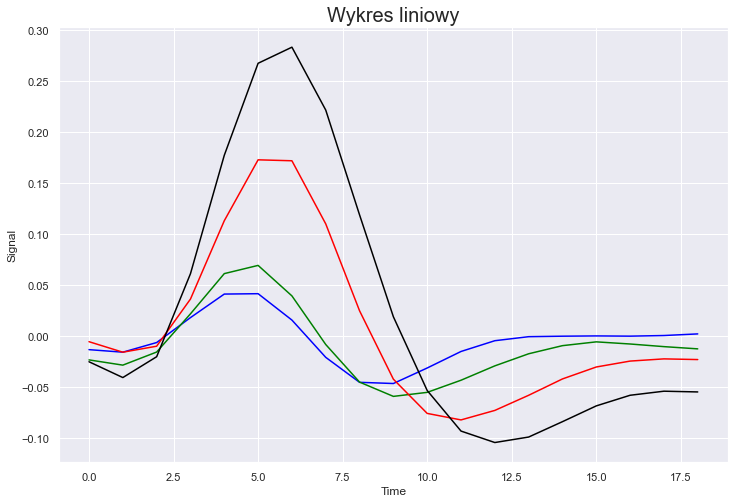

In [32]:
# Data filters
mask1 = (fmri_agg['event'] == 'cue') & (fmri_agg['region'] == 'frontal')
mask2 = (fmri_agg['event'] == 'cue') & (fmri_agg['region'] == 'parietal')
mask3 = (fmri_agg['event'] == 'stim') & (fmri_agg['region'] == 'frontal')
mask4 = (fmri_agg['event'] == 'stim') & (fmri_agg['region'] == 'parietal')

plt.figure(figsize=(12, 8))

plt.plot('timepoint', 'signal', data=fmri_agg[mask1], color='blue')
plt.plot('timepoint', 'signal', data=fmri_agg[mask2], color='green')
plt.plot('timepoint', 'signal', data=fmri_agg[mask3], color='red')
plt.plot('timepoint', 'signal', data=fmri_agg[mask4], color='black')
plt.title('Wykres liniowy', fontsize=20)
plt.xlabel('Time')
plt.ylabel('Signal')

## Prezentaja wielu relacji na róznych polach wykresu

Czasami chcemy zrozumieć jakie zachodzą relację między zmiennymi wizualizując je na oddzienlych polach wykresu. W tym przypadku przydatnym staję się parametr ```col``` lub ```row```.

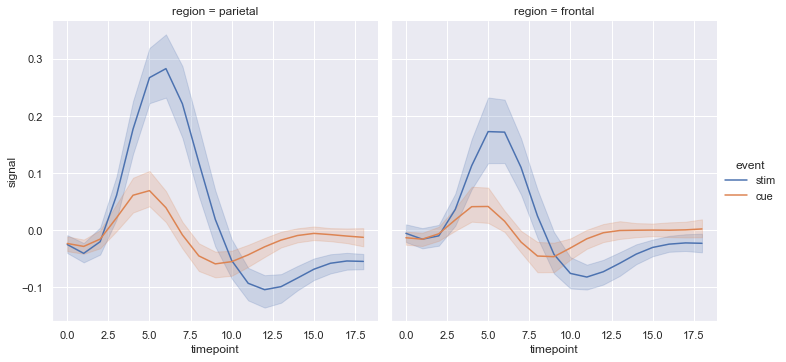

In [33]:
sns.relplot(x="timepoint", y="signal", hue="event",
            col="region", kind='line', data=fmri);

W tym przypadku przydatny okazuje się także wykres oparty o ```plotly```. Jego podstawowa forma wygląda następująco:

In [34]:
fig = px.line(data_frame=fmri_agg, x='timepoint', y='signal', color='event', facet_col='region', title='Wykres liniowy')
fig.show()

Czasami do wykresy opartego o ```seaborn``` warto dodać parametr ```col_wrap```, który umożliwia nam zdefiniowanie liczby kolumn dla danej wizualizacji.

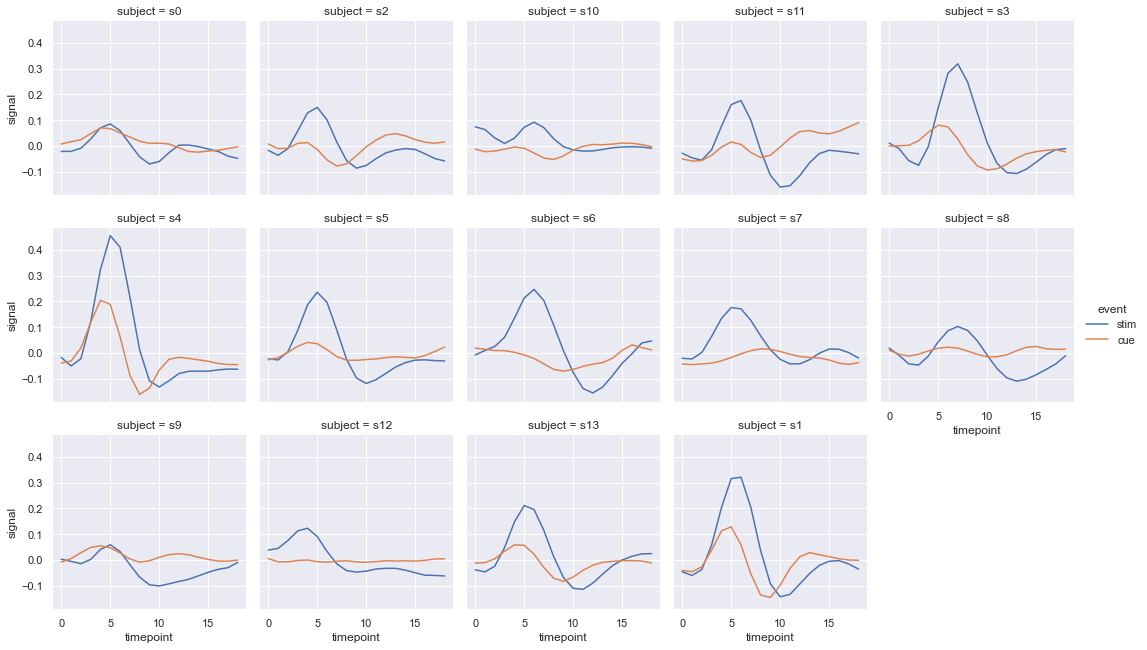

In [35]:
sns.relplot(x="timepoint", y="signal", hue="event", col="subject", 
            col_wrap=5, kind='line', data=fmri.query("region == 'frontal'"), height=3);

#  Wizualizacja rozkładu zmiennych

Jednym z pierwszych kroków podczas budowy modeli uczenia maszynowego powinno być zrozumienie, w jaki sposób rozkładają się zmienne. Techniki wizualizacji rozkładu zmiennych mogą dostarczyć szybkich odpowiedzi na wiele ważnych pytań. Jaki zakres obejmują obserwacje? Jaka jest ich główna tendencja? Czy są mocno przekrzywione w jednym kierunku? Czy istnieją znaczące wartości odstające? Czy odpowiedzi na te pytania różnią się w podzbiorach zdefiniowanych przez inne zmienne?

Biblioteka ```seaborn``` zawiera kilka bardzo przydatnych funkcji pod kątem badania rozklładu tj. **histplot(), kdeplot(), ecdfplot() i rugplot()**. Są one zgrupowane w ramach funkcji **displot(), jointplot() i pairplot()**.

Istnieje kilka różnych podejść do wizualizacji rozładu zmiennych, a każde z nich ma swoje względne zalety i wady. Ważne jest, aby zrozumieć te czynniki, aby wybrać najlepsze podejście do konkretnego celu. 

## Rozkład zmiennej jednowymiarowej

Najczęstszym podejściem do wizualizacji rozkładu jest **histogram**, który jest graficzną reprezentacją danych, która agreguje grupę punktów w zakresy określone przez analityka. Podobnie jak w przypadku wykresu słupkowego, histogram kondensuje obserwacje w łatwo interpretowalną wizualizację. Histogram jest jedną z podstawowych form wizualizacji wykorzystywaną w celu określenie rozkładu danej cechy. Podczas pracy z danymi często kluczym jest aby określić w jaki sposób rozkładają się nasze dane - takie informacje można wtedy wykorzystać w dalszej pracy m.in. określając rodzaj algorytmu czy dokonując różnego rodzaju transformacji danej zmiennej.

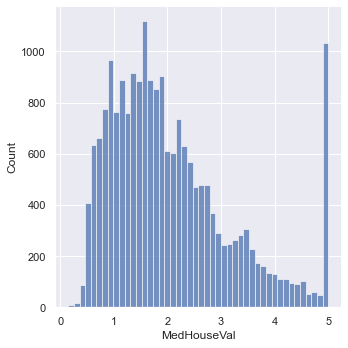

In [36]:
sns.displot(housing, x="MedHouseVal")

Powyższy histogram dla zmiennej _MedHouseVal_ w bardzo szybki sposób jest w stanie przedstawić nam pewne kluczowe informacje na temat zmiennej celu. Przykładem może być kwestia najpopularniszych wartości tej zmiennej która jest na poziomie około 1.5 oraz 5. Jednak bardzo ciekawą sytuacją jest kwestia wartości 5, która jest bardzo popularna jednak z drugiej strony może być pewnego rodzaju błędem - zwłaczsza jak spojrzymy na rozkład zmiennej bez wartości 5, gdzie wartości dla tego ogona są malejące.

W przypadku histogramu bardzo ważną rolę odgrywają parametry ```bins``` lub ```binwdith```, które mówią nam o wielkości lub długości przedziałów dla histogramu. Te same dane przedstawione z inną wartością parametru ```binwidth``` mogą nam odpowiedzieć na zadane pytanie w zupełnie inny sposób. Przykładam jesy poniższy histogram na którym nie widać żadnych anomalii dla wartości zmiennej równej 5.

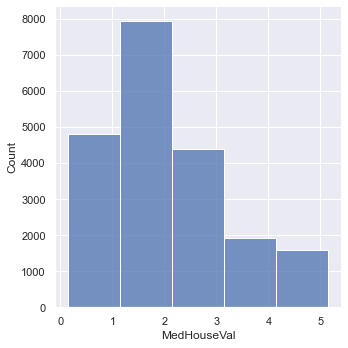

In [37]:
sns.displot(housing, x="MedHouseVal", binwidth=1)

Dodatkowo pokażmy jak ten samy wykres wyglądałby z wykorzystaniem pakietów ```matplotlib``` oraz ```plotly``` - oczywiście poniższe wizualizację uwzględniają domyślne opcję. 

Text(0.5, 0, 'MedHouseVal')

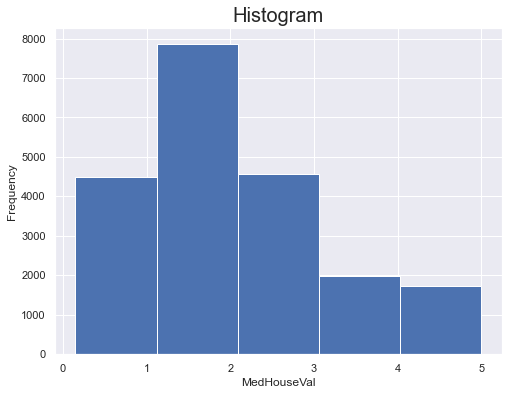

In [38]:
plt.figure(figsize=(8, 6))
plt.hist(x='MedHouseVal', data=housing, bins=5)
plt.title('Histogram', fontsize=20)
plt.ylabel('Frequency')
plt.xlabel('MedHouseVal')        

In [39]:
fig = px.histogram(data_frame=housing, x='MedHouseVal', nbins=5, title='Histogram')
fig.show()

## Wizualizacja zmiennych kategorycznych 

Możliwa jest również wizualizacja rozkładu zmiennej kategorycznej za pomocą logiki histogramu.W tym pzypadku pomocny może być parametr ```shirnk```, który nieco zwężą słupki aby podkreślić kategorialny charakter osi.

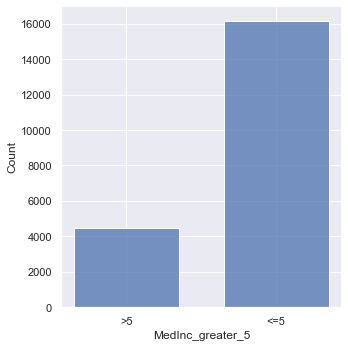

In [40]:
sns.displot(housing, x="MedInc_greater_5", shrink=0.7)

## Rozkład warunkowy względem innych zmiennych

Po zrozumieniu rozkładu zmiennej, następnym krokiem jest często pytanie, czy cechy tego rozkładu różnią się od innych zmiennych w zbiorze danych. ```displot``` zapewnia obsługę podzbiorów warunkowych poprzez barwy.  

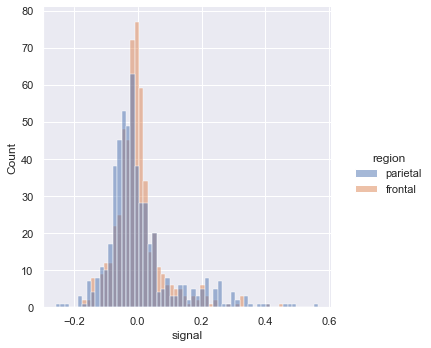

In [41]:
sns.displot(fmri, x='signal', hue="region")

Czasam warto nieco zmienić wizualizacje naszych danych poprzez zmianę wartości parametru ```element``` na _step_. Pomaga to czasem nieco lepiej zauwazyć różnicę w danych.

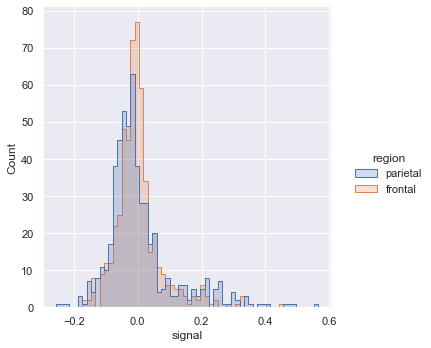

In [42]:
sns.displot(fmri, x='signal', hue="region", element='step')

Innym rozwiązaniem jest pokazanie rozkładów, które się na siebie nakładają.

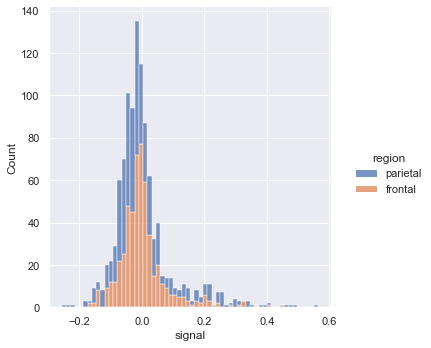

In [43]:
sns.displot(fmri, x='signal', hue="region", multiple='stack')

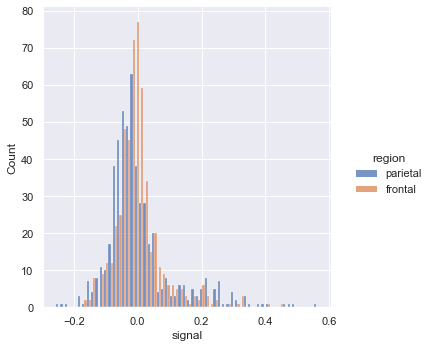

In [44]:
sns.displot(fmri, x='signal', hue="region", multiple='dodge')

Rozkłady możemy też pokazać na dwóch osobnych wykresach.

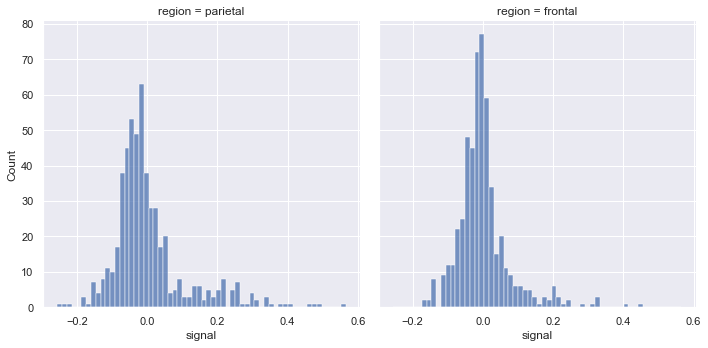

In [45]:
sns.displot(fmri, x='signal', col="region")

<div class="alert alert-block alert-success">
<b>Wnioski</b> 
    
Wybór wizualizacji zależy głównie od analityka i od problemu, który pragnie rozwiązać. Róznego rodzaju dane wymagają róznego podejścia.
</div>


Wartym zaznaczenia jest jeszcze jeden przydatny parametr, mianowicie ```stat```. Umożliwia on nam zmianę sposobu wyświetlenia zmiennej z domyślnej _count_ na _density_ lub _probability_.

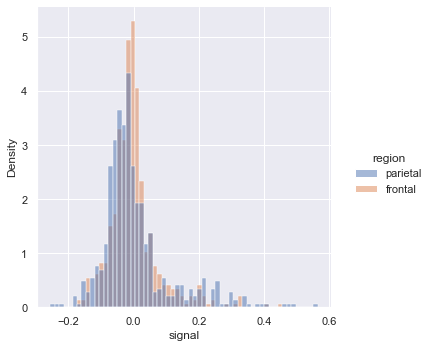

In [46]:
sns.displot(fmri, x='signal', hue="region", stat='density')

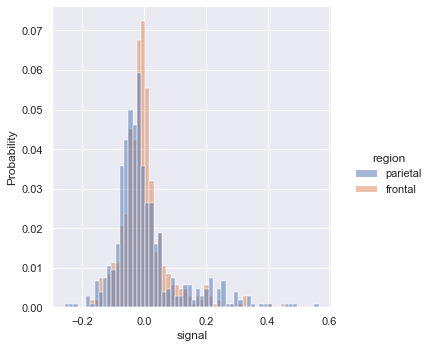

In [47]:
sns.displot(fmri, x='signal', hue="region", stat='probability')

## Gęstość rozkładu

Histogram ma na celu przybliżenie podstawowej funkcji gęstości prawdopodobieństwa, która wygenerowała dane, poprzez grupowanie i liczenie obserwacji. Szacowanie gęstości jądra (KDE) przedstawia inne rozwiązanie tego samego problemu. Zamiast używać oddzielnych przedziałów, wykres KDE wygładza obserwacje za pomocą jądra Gaussa, tworząc ciągłe oszacowanie gęstości rozkładu.

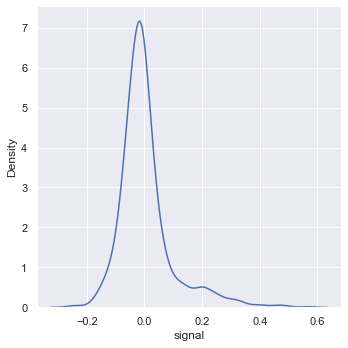

In [48]:
sns.displot(fmri, x='signal', kind='kde')

Podobnie jak w przypadku histogramu, wykres _kde_ posiada parametr ```bw_adjust``` (parametr wygładzenia), który spełnia podobną rolę co ```binwidth``` lub ```bins``` dla histogramu. Ustawnienie tego parametru na zbyt niskim poziomie spowoduje nadmierne dopasowanie dodanych, w odwrotnym przypadku nadrmierne wygładzenie spowoduję wymazanie znaczących cech rozkładu.

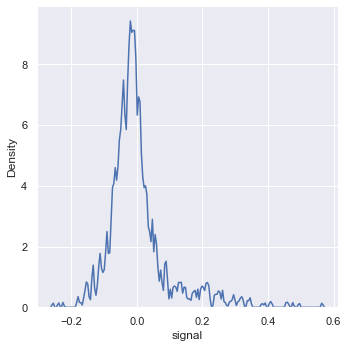

In [49]:
sns.displot(fmri, x='signal', kind='kde', bw_adjust=0.1)

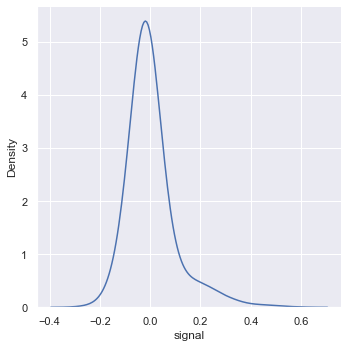

In [50]:
sns.displot(fmri, x='signal', kind='kde', bw_adjust=2)

Rozkład gęstości ma podobne funkcjonalności jak wyżej przedstawiony histogram. Oto kilka z nich:

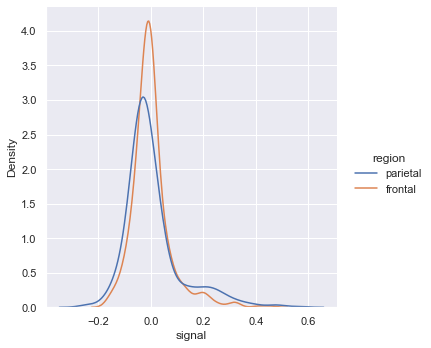

In [51]:
sns.displot(fmri, x="signal", hue="region", kind="kde")

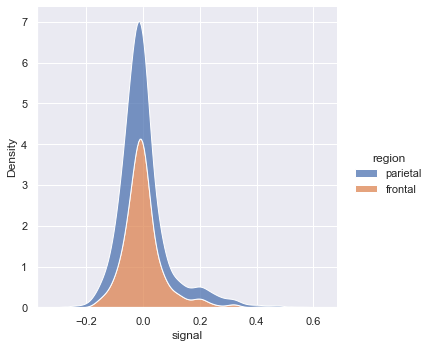

In [52]:
sns.displot(fmri, x="signal", hue="region", multiple='stack', kind="kde")

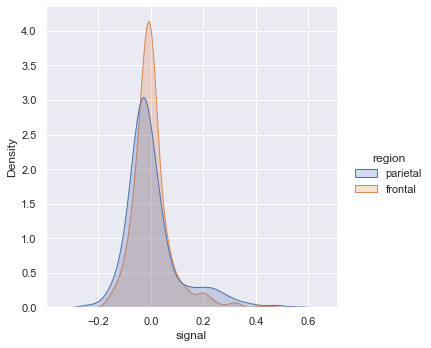

In [53]:
sns.displot(fmri, x="signal", hue="region", fill=True, kind="kde")

Bardzo częstym podejściem podczas wizualizacji danych jest skorzystanie z obu typów wykresu jednocześnie.

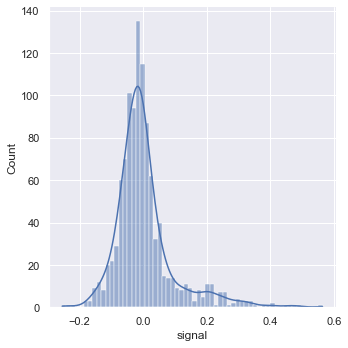

In [54]:
sns.displot(fmri, x="signal", kde=True)

## Dystrybuanta rozkładu 

Trzecia opcja wizualizacji rozkładów oblicza empiryczną dystrybuantę rozkładu (ECDF).

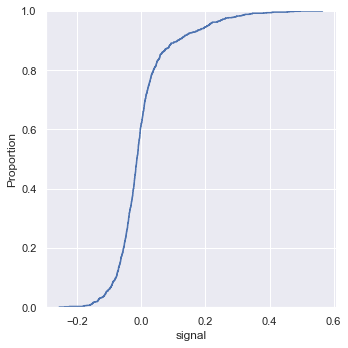

In [55]:
sns.displot(fmri, x="signal", kind='ecdf')

Wizualizacja dystrybuanty rozkładu ma dwie istotne zalety. Po pierwsze bezpośrednio reprezentuje każdy punkt danych. Oznacza to, że nie trzeba brać pod uwagę rozmiaru przedziału ani parametru wygładzania. Dodatkowo, ponieważ krzywa rośnie monotonicznie, dobrze nadaje się do porównywania wielu rozkładów.

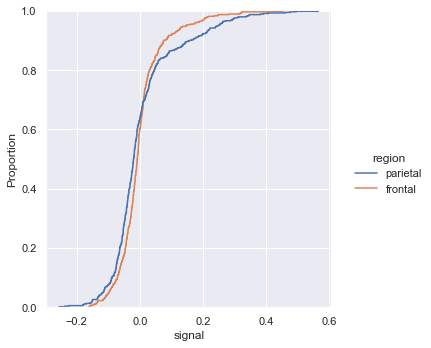

In [56]:
sns.displot(fmri, x="signal", hue="region", kind="ecdf")

Główną wadą wykresu dystrybuanty jest to, że mniej intuicyjnie przedstawia kształt rozkładu niż histogram lub krzywa gęstości. 

## Rozkład wielowymiarowy

Wszystkie dotychczasowe przykłady uwzględniały rozkłady jednowymiarowe: rozkłady jednej zmiennej, z uwzględnieniem zależności od drugiej zmiennej przypisanej do barwy. Teraz zajemiemy się badaniem rozkładów dwuwymiarowych.

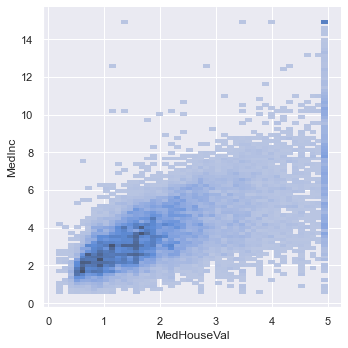

In [57]:
sns.displot(housing, x="MedHouseVal", y="MedInc")

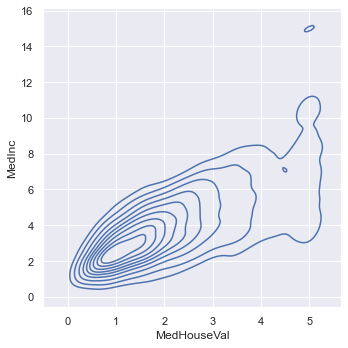

In [58]:
sns.displot(housing, x="MedHouseVal", y="MedInc", kind='kde')

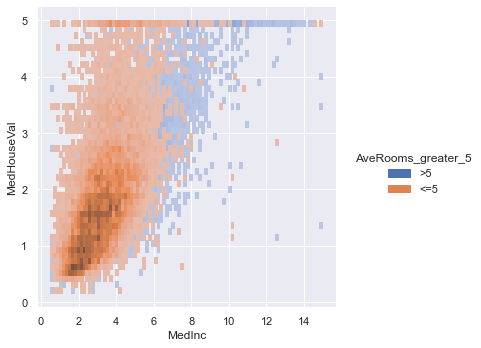

In [59]:
sns.displot(housing, x="MedInc", y="MedHouseVal", hue="AveRooms_greater_5")

In [60]:
sns.displot(housing, x="MedInc", y="MedHouseVal", hue="AveRooms_greater_5", kind='kde')

Jak widać każdy z powyższych wykresów posiada podobne lub wręcz takie same parametry jak w przypadku wykresów jednowymiarowych. Zachęcam do zgłębienia innych dodatkowych opcji pod kątem analizy rozkładu jedno i dwuwymiarowego. 

Ostatnim typem wykresu, który warto mieć w zanadrzu podczas analizy rozkładu jest ```jointplot```. 

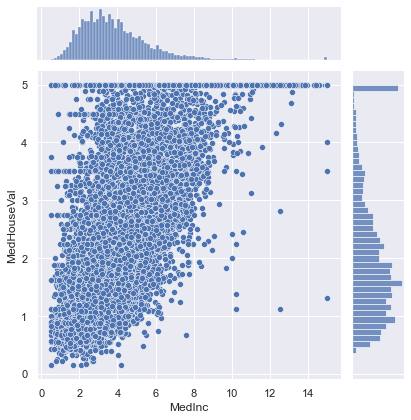

In [ ]:
sns.jointplot(data=housing, x="MedInc", y="MedHouseVal")

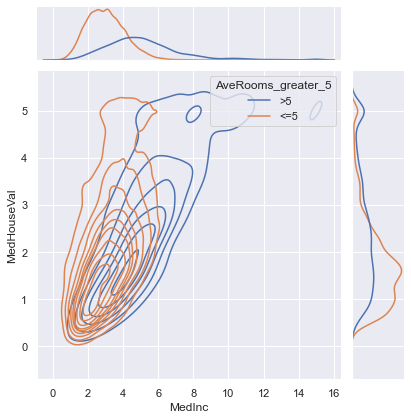

In [ ]:
sns.jointplot(data=housing, x="MedInc", y="MedHouseVal", hue="AveRooms_greater_5", kind='kde')

Zaletą wykresy typu ```joinplot``` jest dodatkowe wyświetlanie jednowymiarowego rozkładu zmiennej w postaci histogramu lub funkcji gęstości. Dzięki temu możemu jeszcze lepiej zrozumieć relacje zachodzące w naszym zbiorze danych.

# Wizualizacja modeli regresyjnych 

Zazwyczaj zbiory danych zawierają wiele zmiennych numerycznych, a celem analizy jest często powiązanie tych zmiennych ze sobą. Wcześniej omówione zostały funkcje, które mogą to pokazują łączny rozkład dwóch zmiennych lub pewne relacje określone wykresem punktowym. Bardzo pomocne może być jednak wykorzystanie modeli statystycznych do oszacowania prostej zależności między dwoma zaszumionymi zestawami obserwacji. 

<div class="alert alert-block alert-info">
<b>Info</b> 
    
Pakiet ```seaborn``` nie jest pakietem do analizy statystycznej. Aby uzyskać miary ilościowe związane z dokładnym dopasowaniem modeli regresji, należy użyć modeli statystycznych zawartych w bibliotekach ```sklearn``` czy ```statsmodels```. 
</div>


## Wizualizacja regresji liniowej

W ```seaborn``` wykorzystywane są dwie główne funkcje do wizualizacji zależności liniowej określonej za pomocą regresji. Te funkcje to: **regplot()** i **lmplot()**. Obie funkcje są ze sobą ściśle powiązane i dzielą większość swoich podstawowych parametrów. 

W najprostszym użyciu obie funkcje rysują wykres rozrzutu dwóch zmiennych, _x_ i _y_, a następnie dopasowują model regresji y ~ x. Następnie wykreślają wynikową linię regresji oraz 95% przedział ufności. 

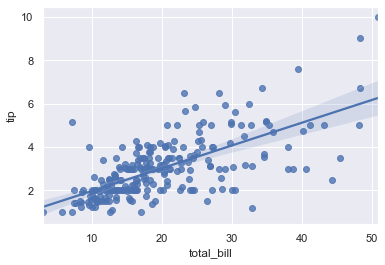

In [ ]:
sns.regplot(x="total_bill", y="tip", data=tips);

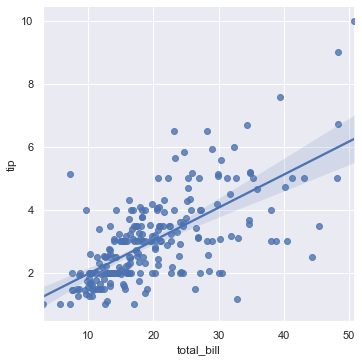

In [ ]:
sns.lmplot(x="total_bill", y="tip", data=tips);

W poniższym notatniku w głównej mierze skupimy się na funkcji ```lmplot```.

Możliwe jest dopasowanie regresji liniowej, gdy jedna ze zmiennych przyjmuje wartości dyskretne, jednak prosty wykres rozrzutu utworzony przez ten rodzaj danych często jest nieoptymalny.

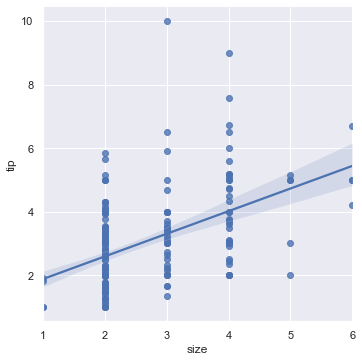

In [ ]:
sns.lmplot(x="size", y="tip", data=tips);

Jedną z opcji rozwiązania tego problemu jest dodanie losowego szumu _jitter_ do wartości dyskretnych, aby rozkład tych wartości był bardziej przejrzysty. 

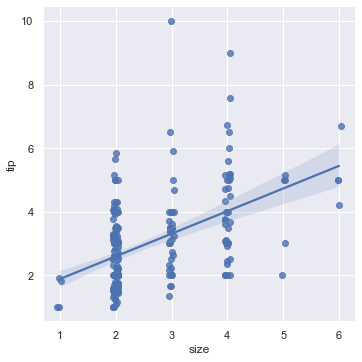

In [ ]:
sns.lmplot(x="size", y="tip", data=tips, x_jitter=.05);

Drugą opcją jest "zwinięcie" obserwacji w każdym dyskretnym przedziale, aby wykreślić oszacowanie tendencji centralnej (w tym przypadku średniej) wraz z przedziałem ufności.

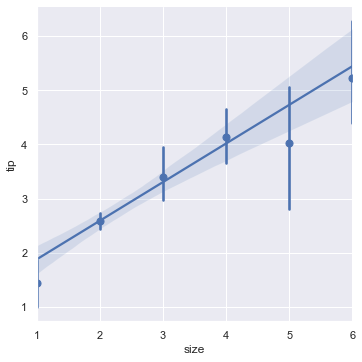

In [ ]:
sns.lmplot(x="size", y="tip", data=tips, x_estimator=np.mean);

## Wizualizacja z wykorzystaniem innych modeli

## Wizualizacja wielu relacji jednocześnie

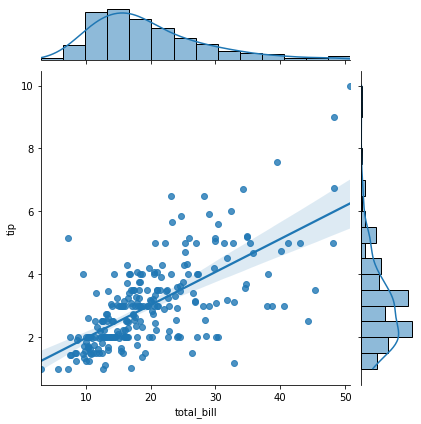

In [ ]:
sns.jointplot(x="total_bill", y="tip", data=tips, kind="reg");

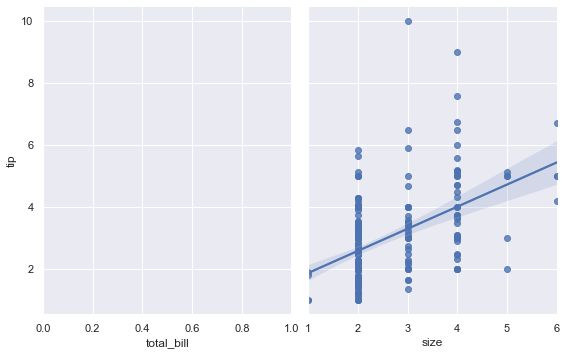

In [ ]:
sns.pairplot(tips, x_vars=["total_bill", "size"], y_vars=["tip"],
             height=5, aspect=.8, kind="reg");

# Wizualizacja danych kategorycznych

Powyższe metody wizulizacji skupiały się najczęściej na danych liczbowych, gdzie zmienna kategoryczna była nam potrzebna jedynie do grupowania czy agregowania naszych danych. W tej części skupimy się na metodach bezpośrednij wizualizacji zmiennej kategorycznej.   

## Zmienna kategoryczna w postaci wykresu punktowego

Podstawową formą wizualizacji dla zmiennej katgorycznej jest wykres rozrzutu przedstawiający daną zmienną liczbową w zależności od zmiennej kategorycznej. Parametr _kind == strip_ oznacza, że do zmiennej _y_ dodawany jest pewinen element losowy w celu "rozrzucenia" obserwacji na osi y. Tak przedstawiony wykres może nam odpowiedzieć na pytania dotyczące rozkładu naszej zmiennej _y_ wzlędem zmiennej _x_ oraz może pomóc nam dostrzeć pewne anomalie w naszych danych.

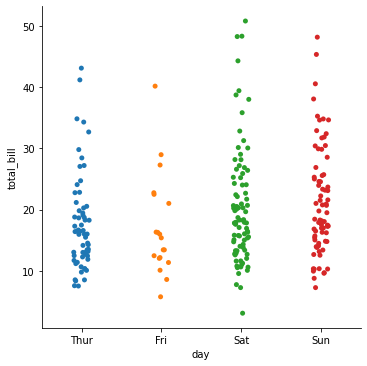

In [ ]:
sns.catplot(x="day", y="total_bill", kind="strip", data=tips)

Tak wykres wyglądałby w przypadku pominięcia dodawania składnika losowego do każdej obserwacji z osobna.

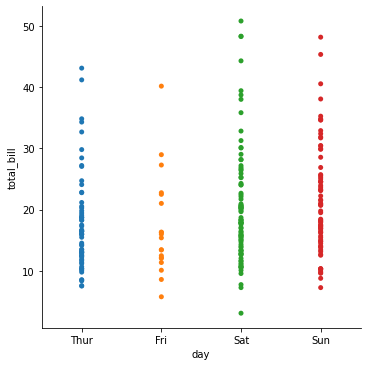

In [ ]:
sns.catplot(x="day", y="total_bill", jitter=False, data=tips)

Czasami dobrym pomysłem jest, także dodanie do wykresu kolejnego wymiaru (w tym przypadku płci). Może nam to pomoć zrozumieć kolejne relacje zachodzące w naszych danych. 

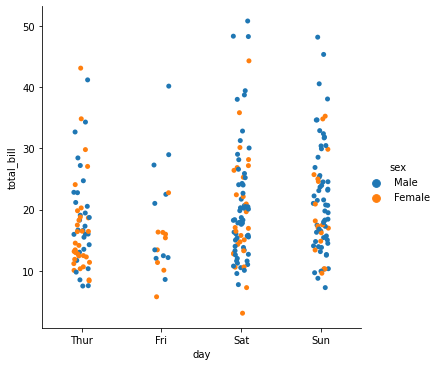

In [ ]:
sns.catplot(x="day", y="total_bill", hue="sex", kind="strip", data=tips)

## Rozkład zmiennej w zależności od danych kategorycznych

W poprzednich wizualizacjach pokazaliśmy w jaki sposób można zwizulizować histogram, a wieć wykres rozkładu naszej zmiennej w zależności od danych kategorycznych. Istnieją również innego rodzju wykresy, które będące odpowiedzią na rozkład naszej zmiennej - **wykresy pudełkowe**. 

Podstawowy wykres pudełkowy można uzyskać korzystając z ```matplotlib```.

{'whiskers': [<matplotlib.lines.Line2D at 0x92f8790588>,
 'caps': [<matplotlib.lines.Line2D at 0x92f87b5e88>,
 'boxes': [<matplotlib.lines.Line2D at 0x92f8790688>],
 'medians': [<matplotlib.lines.Line2D at 0x92f87bbc88>],
 'fliers': [<matplotlib.lines.Line2D at 0x92f87bbc48>],
 'means': []}

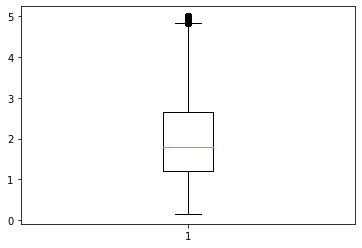

In [ ]:
plt.boxplot(x=housing['MedHouseVal'])

Jednakże, tym samym małym wysiłkiem można uzyskać dużo ładniejszy wykres korzystając z API ```seaborn```.

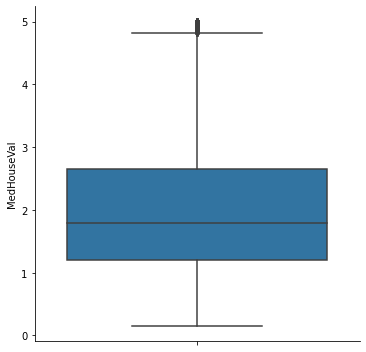

In [ ]:
sns.catplot(y='MedHouseVal', data=housing, kind="box")

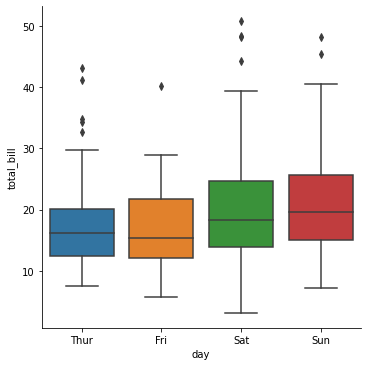

In [ ]:
sns.catplot(x="day", y="total_bill", kind="box", data=tips)

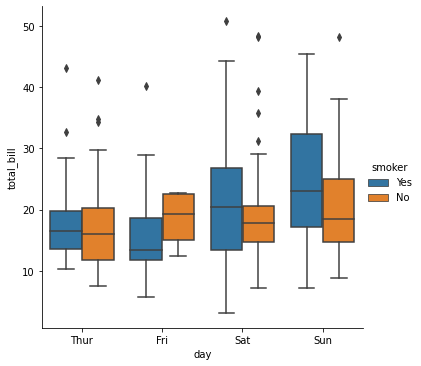

In [ ]:
sns.catplot(x="day", y="total_bill", hue="smoker", kind="box", data=tips)

Interpretacja wykresu pudełkowego jest dość prosta. Są w nim zawarte informacje na temat wartości minimalnej, kwartylu I, medianie, kwartylu III, wartości maksymalnej oraz potencjalnym anomalią wyliczonym przy pomocy rozstępu między kwartylowego. Jednakże wykres pudełkowy można zastąpić innymi podobnymi wizualizacjami, którą czasami mogą okazać się bardzo pomocne.

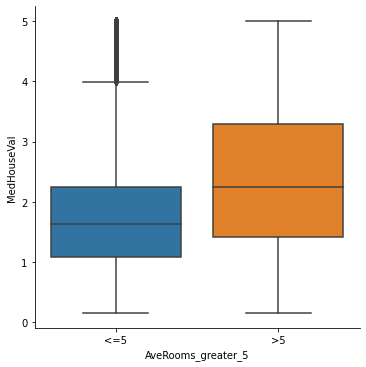

In [ ]:
sns.catplot(x="AveRooms_greater_5", y="MedHouseVal", kind="box",
            data=housing.sort_values("AveRooms_greater_5"))

Wykresem podobnym do wykresu pudełkowego - _boxplot_, ale zoptymalizowany pod kątem wyświetlania większej ilości informacji o kształcie rozkładu jest inny wykres pudełowy - _boxenplot_.

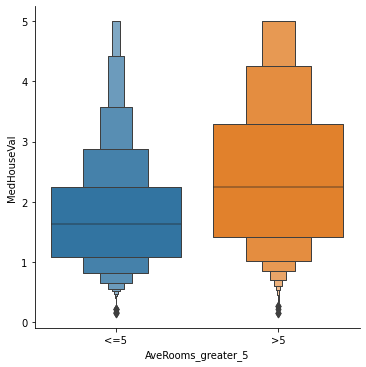

In [ ]:
sns.catplot(x="AveRooms_greater_5", y="MedHouseVal", kind="boxen",
            data=housing.sort_values("AveRooms_greater_5"))

Ciekawą oraz często wykorzystywana interpretacją rozkładu jest _violinplot*_ łączący wykres pudełkowy z estymacją gęstości rozkładu. Jest on w stanie jeszcze dokładniej pomóc nam oszacować miejsca w których występują większe skupiska naszych obserwacji.

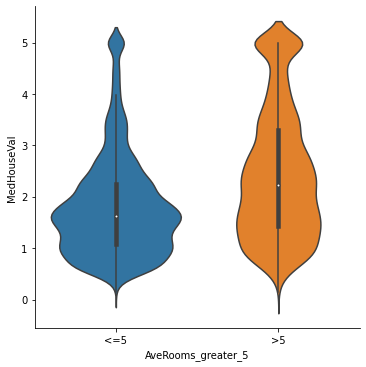

In [ ]:
sns.catplot(x="AveRooms_greater_5", y="MedHouseVal", kind="violin",
            data=housing.sort_values("AveRooms_greater_5"))

Dobrym połączeniem jest _violinplot_ z _stripplot_, czyli przedstawionym wcześniej wykresem rozrzutu. Jednakże w przypadku dużej ilości danych wizualizacja może się długo ładować.

<AxesSubplot:xlabel='day', ylabel='total_bill'>

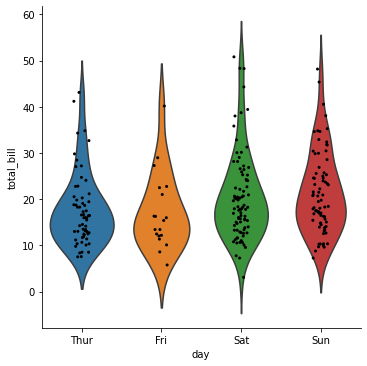

In [ ]:
g = sns.catplot(x="day", y="total_bill", kind="violin", inner=None, data=tips)
sns.stripplot(x="day", y="total_bill", color="k", size=3, data=tips, ax=g.ax)

Podczas pracy z danymi są sytuację gdy chcemy aby nasz wykres był bardziej interaktywny. Wtedy w przypadku wykresu pudełkowego można skorzystać z API ```plotly```. Podstawowa forma takiego wykresu wygląda następująco:

In [ ]:
fig = px.box(data_frame=tips, x='day', y='total_bill', title='Wykres pudełkowy')
fig.show()

## Estymacja statystyczna w ramach zmiennej kategorycznej

W pewnych przypadkach naszym celem może być oszacowanie tendencji centralnej dla naszych danych np. średniej czy mediany. Wtedy bardzo często korzysta się z wykresu słupkowego wraz z pewnym pozniomem ufności. W przypadku biblioteki seaborn narysowanie tego typu wykresu jest bardzo proste. Domyślnie tendecją centralną jest średnia arytmetyczna.

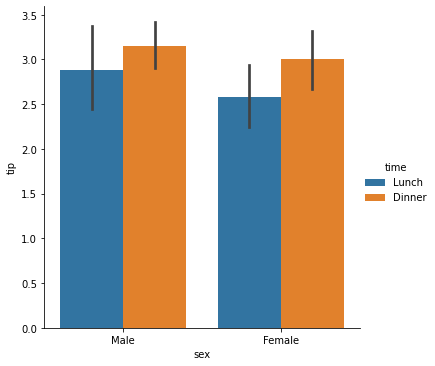

In [ ]:
sns.catplot(x="sex", y="tip", hue="time", kind="bar", data=tips)

Szczególnym przypadkiem wykresu ```catplot``` jest wykres przedstawiający liczbę obserwacji przypadającą na daną kategorię.

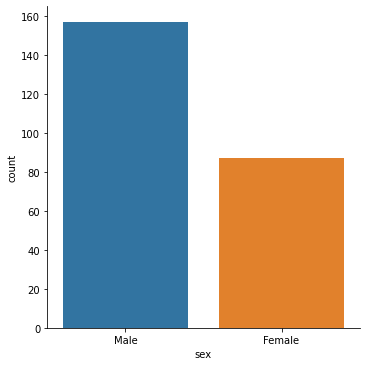

In [ ]:
sns.catplot(x="sex", kind="count", data=tips)

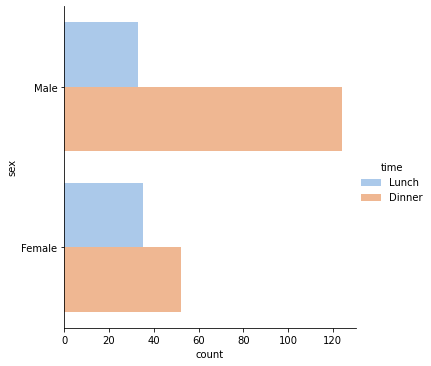

In [ ]:
sns.catplot(y="sex", hue="time", palette="pastel",  kind="count", data=tips)

Inna formą wizualizacji może być, także ```pointplot```, który te same relacje przedstawia w postaci wykresu punktowego, gdzie dany punkt przestawia tendencję centralną danej kategorii natomiast pionowe linię określają przedział ufności. Atutem tego wykresu jest łączenie tych samych kategorii podanych w parametrze _hue_. 

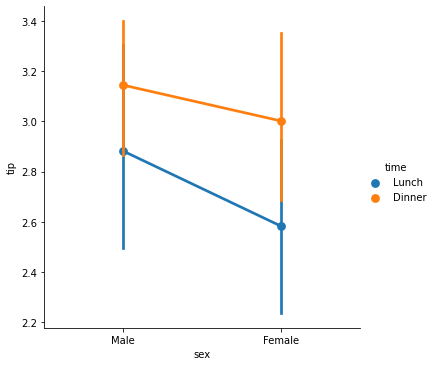

In [ ]:
sns.catplot(x="sex", y="tip", hue="time", kind="point", data=tips)

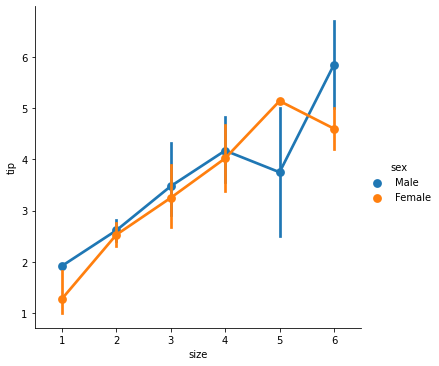

In [ ]:
sns.catplot(x="size", y="tip", hue='sex', kind="point", data=tips)

# Podsumowanie

<div class="alert alert-block alert-success">
<b>Wnioski:</b> 
    
Wykresy oparte o ```pandas``` lub ```matplotlib``` sprawdzają się w przypadku chęci zbudowania prostej wizualizacji podczas pierwszej fazy _Exploratory Data Analysis_. Wykresy z rodziny ```seaborn``` oraz ```plotly``` dają większe możliwości, dzięki czemu jesteśmy w stanie w ładniejszy sposób przedstawić nasze dane i wyciągnąć na ich podstawie istotne wnioski. 
</div>